In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [3]:
url = "/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-04.csv"
df = pd.read_csv(url, sep=';', low_memory=False)

# Distances Analysis

### Inital view of the data

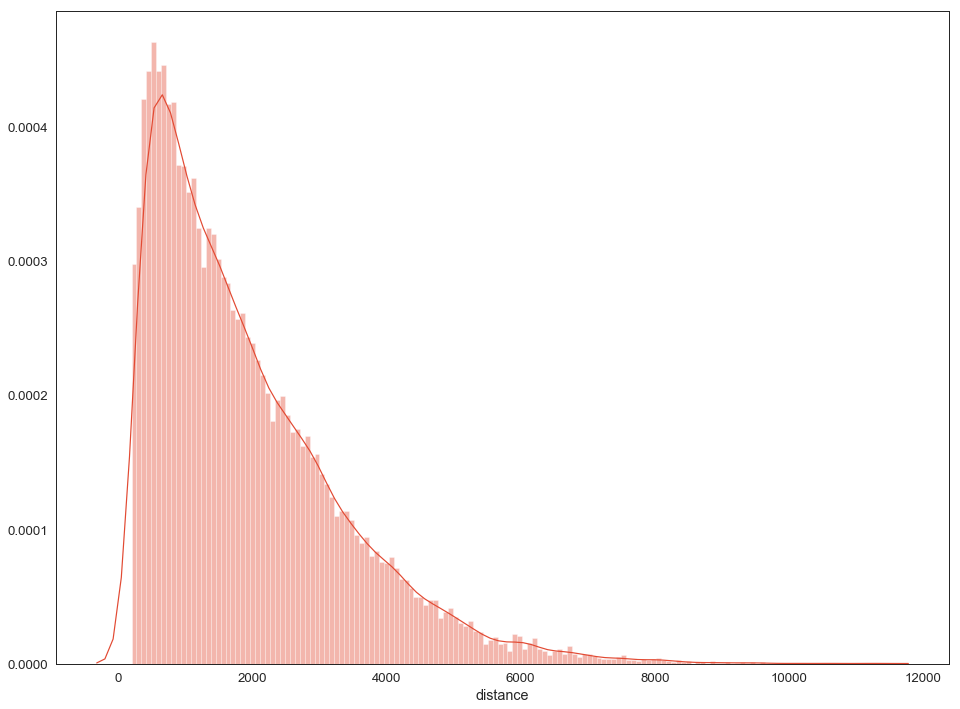

In [4]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['distance'], bins = 150)

In [5]:
distance = df["distance"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
beta,3448.709339,-1.031049e+06,inf,1.504178e-08
gamma,3290.436366,-1.020035e+06,inf,2.040223e-08
burr,3223.639803,-9.440920e+05,inf,1.665124e-07
norm,4322.505685,-8.921412e+05,inf,7.006632e-07
lognorm,3755.260759,-8.281698e+05,inf,4.107070e-06


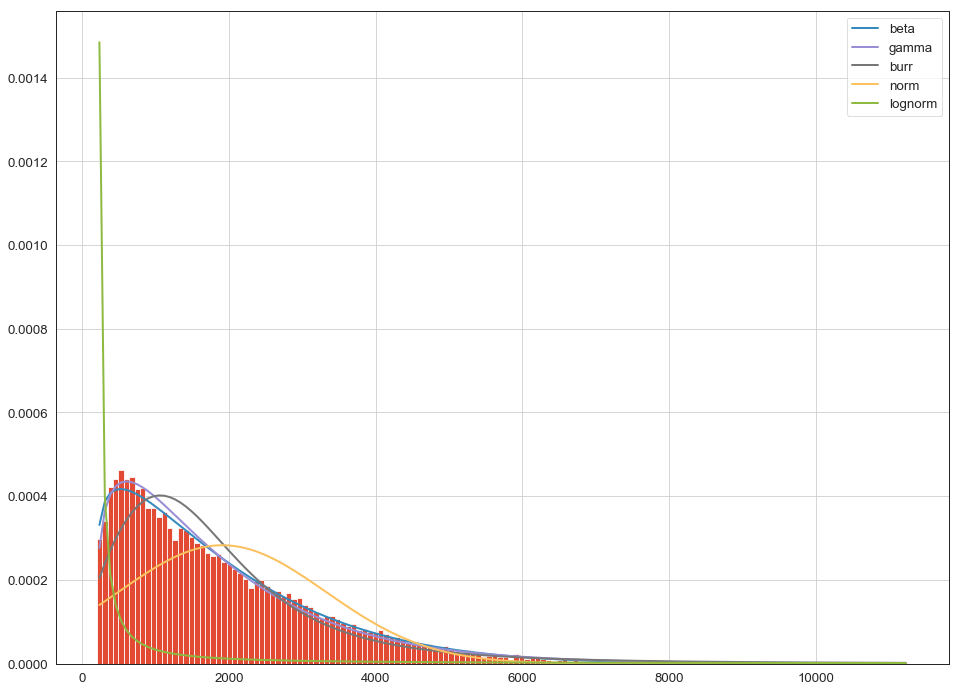

In [6]:
f = Fitter(distance,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins=150)
f.fit()
f.summary()

In [7]:
f.get_best(method = 'sumsquare_error')

{'beta': (1.1787780686057456,
  8.820159494315309,
  199.74585275501195,
  14509.729529027834)}

In [8]:
f.get_best(method = 'aic')

{'burr': (2.6749735251834412,
  0.6098513105280461,
  -10.373205937932948,
  2075.266560845201)}

In [9]:
f.get_best(method = 'bic')

{'beta': (1.1787780686057456,
  8.820159494315309,
  199.74585275501195,
  14509.729529027834)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
beta,3448.709339,-1.031049e+06,inf,1.504178e-08
burr,3223.639803,-9.440920e+05,inf,1.665124e-07
bradford,2883.908066,-8.971683e+05,inf,6.095638e-07
norm,4322.505685,-8.921412e+05,inf,7.006632e-07
alpha,3157.474784,-8.917571e+05,inf,7.079385e-07


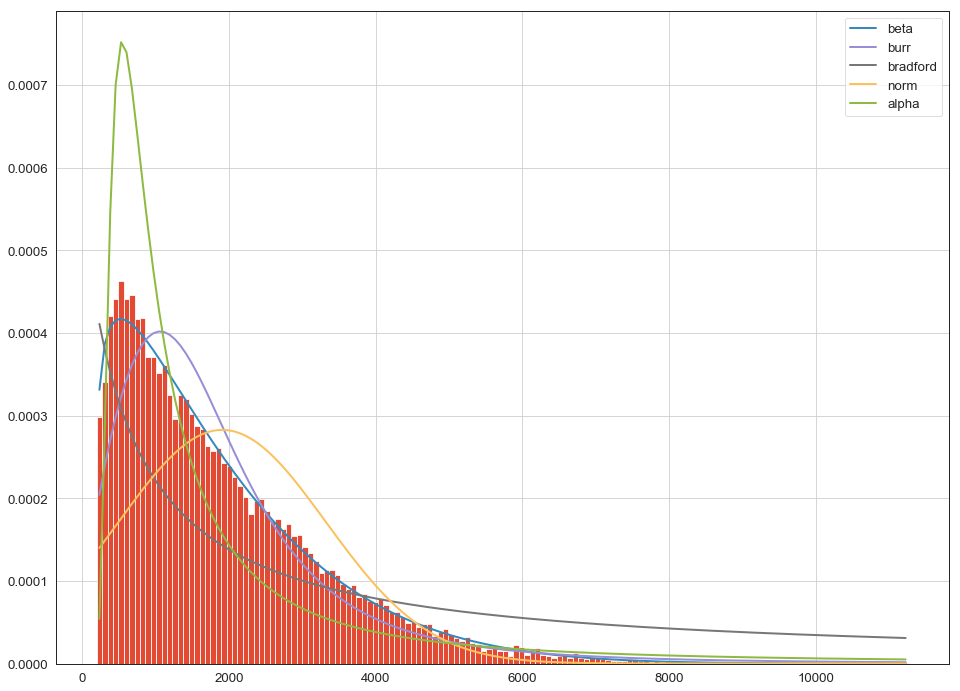

In [10]:
f = Fitter(distance,
           distributions= ['alpha','beta','norm','bradford','burr'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
chi,3483.216533,-964924.312495,inf,9.363216e-08
expon,3207.320195,-944412.235682,inf,1.651406e-07
dgamma,3661.121078,-895888.285858,inf,6.315226e-07
cosine,3021.862288,-857086.403655,inf,1.846870e-06
chi2,364169.421365,-832124.122181,3.818846,3.681712e-06


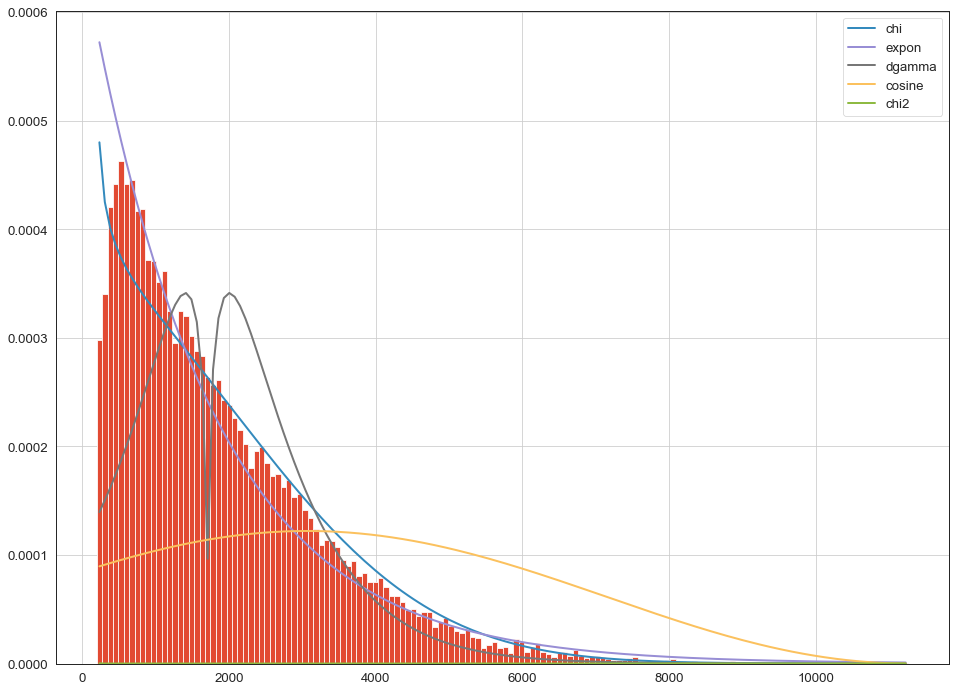

In [11]:
f = Fitter(distance,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gamma,3290.436366,-1.020035e+06,inf,2.040223e-08
exponnorm,3228.238495,-9.716100e+05,inf,7.782977e-08
fatiguelife,3246.872936,-9.683378e+05,inf,8.519953e-08
fisk,3172.495632,-9.427801e+05,inf,1.727136e-07
f,3229.103003,-9.418884e+05,inf,1.769730e-07


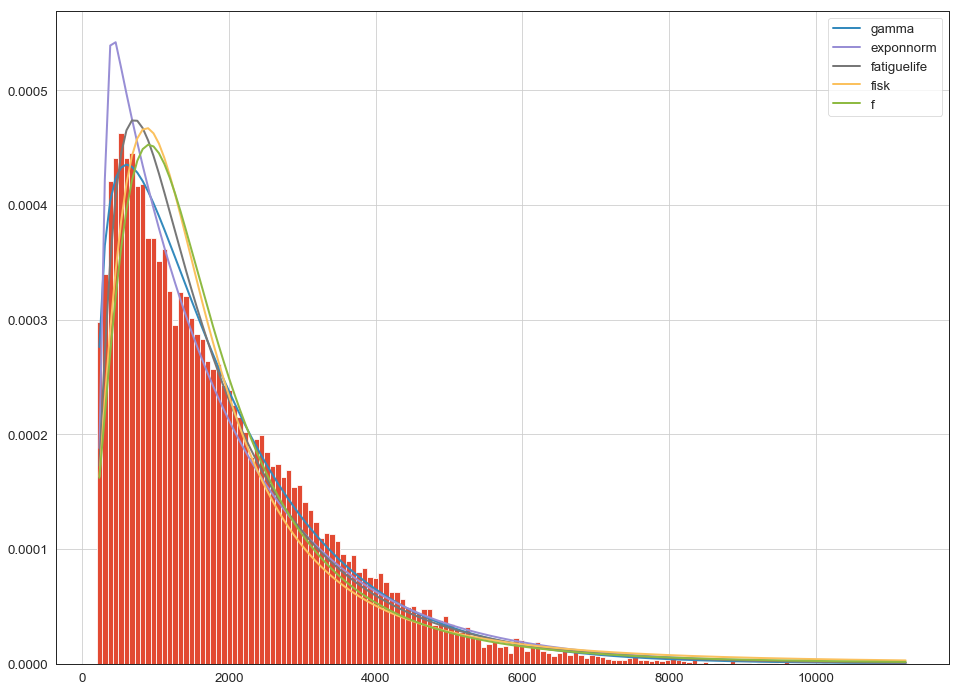

In [12]:
f = Fitter(distance,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
gengamma,3211.814563,-944056.162118,inf,1.666777e-07
levy,3097.757152,-899760.394063,inf,5.675705e-07
loggamma,4272.111833,-891866.883042,inf,7.057920e-07
genexpon,3083.703015,-878717.166350,inf,1.014665e-06
lognorm,3755.260759,-828169.807979,inf,4.107070e-06


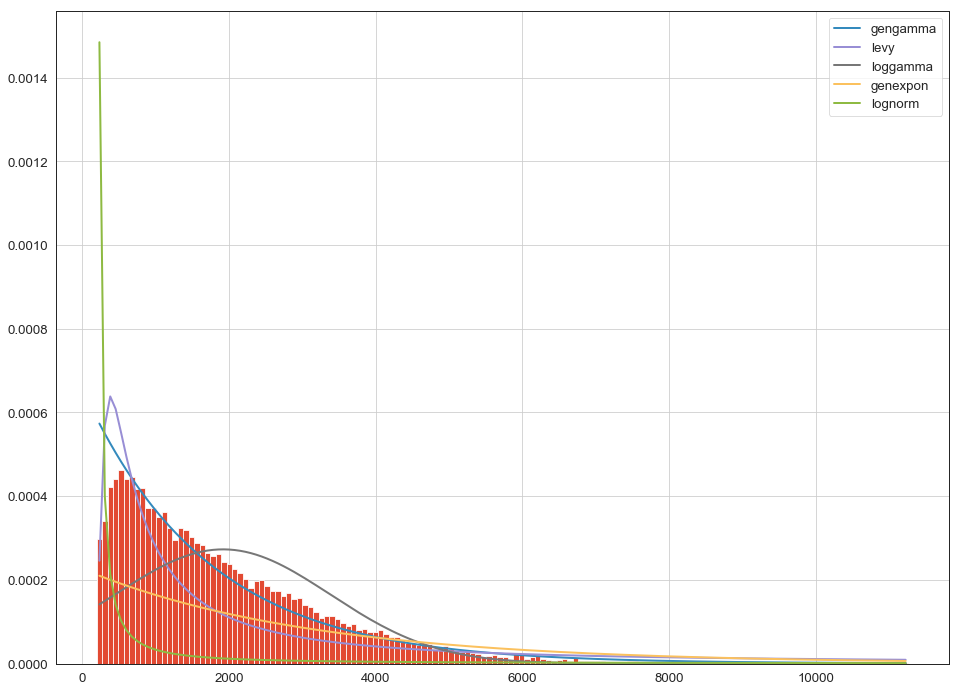

In [13]:
f = Fitter(distance,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins=150)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
pearson3,3290.436364,-1.020035e+06,inf,2.040223e-08
t,3550.382077,-8.992593e+05,inf,5.753219e-07
logistic,3708.321608,-8.972179e+05,inf,6.089050e-07
powerlaw,2884.492150,-8.655456e+05,inf,1.461283e-06
pareto,3202.265958,-8.224347e+05,inf,4.812791e-06


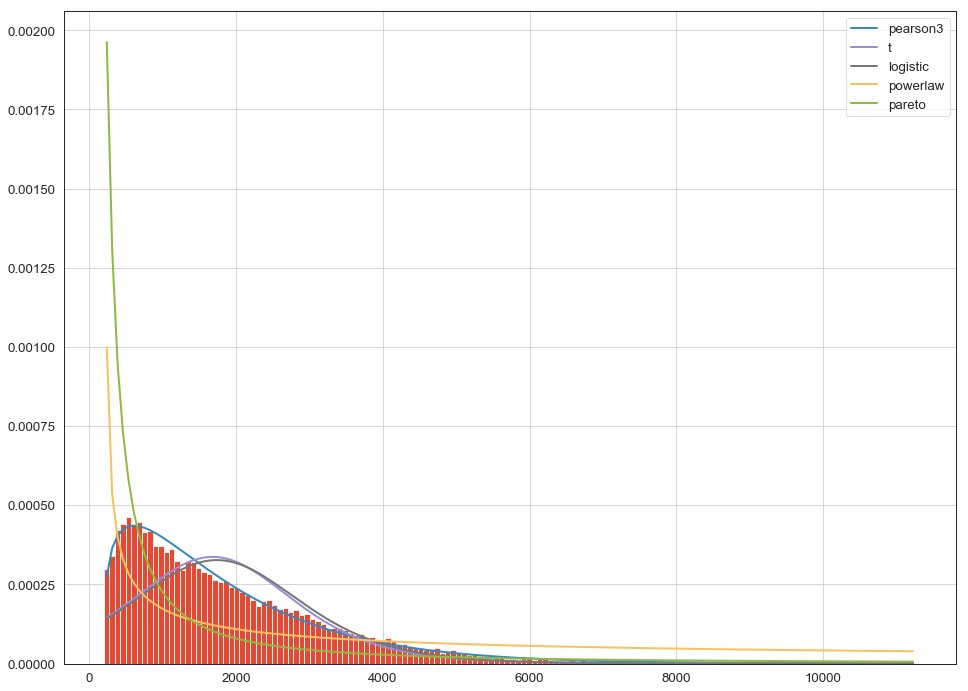

In [14]:
f = Fitter(distance,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins=150)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
beta,3448.709339,-1.031049e+06,inf,1.504178e-08
pearson3,3290.436364,-1.020035e+06,inf,2.040223e-08
gamma,3290.436366,-1.020035e+06,inf,2.040223e-08
chi,3483.216533,-9.649243e+05,inf,9.363216e-08
gengamma,3211.814563,-9.440562e+05,inf,1.666777e-07


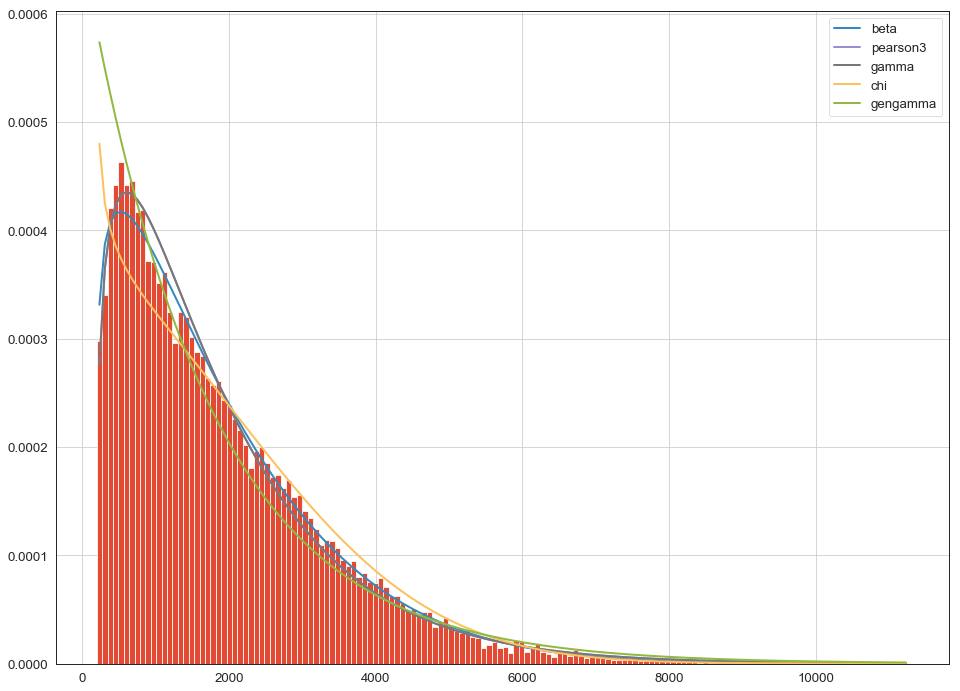

In [15]:
f = Fitter(distance,
           distributions= ['beta','chi','gamma', 'gengamma', 'pearson3'], bins=150)

f.fit()
f.summary()

## Rides Analysis

### Inital view of the data

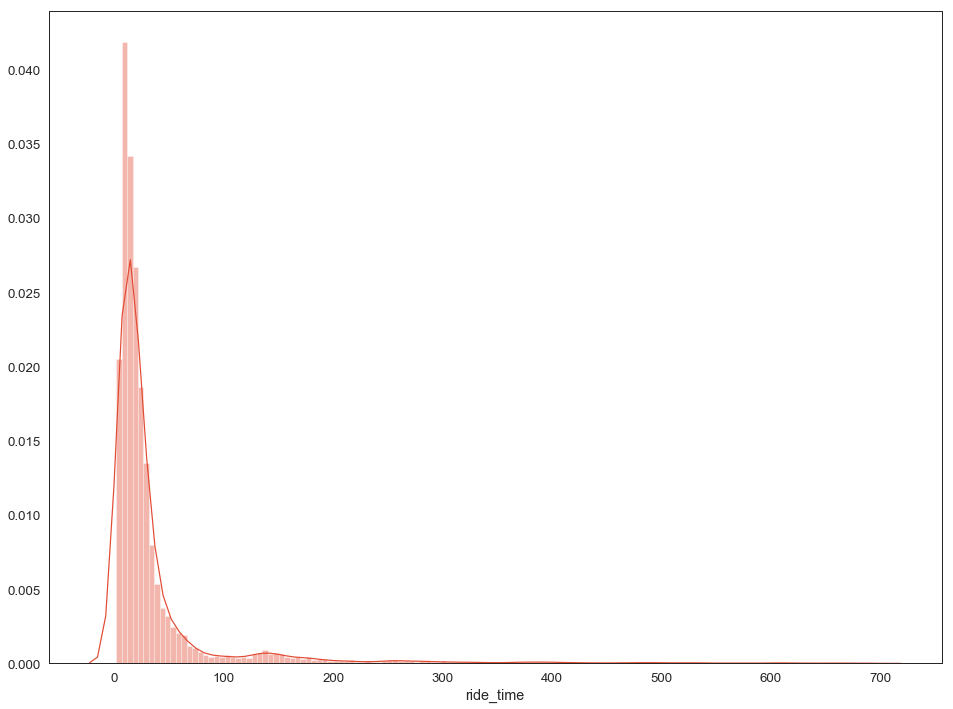

In [16]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df['ride_time'], bins = 140)

In [17]:
rides = df["ride_time"].values

#### 5 common distributions

,aic,bic,kl_div,sumsquare_error
burr,2647.758064,-724511.734818,0.025628,0.000072
lognorm,2827.664921,-672312.846385,0.068544,0.000306
beta,3464.799342,-630330.338679,0.216203,0.000975
norm,5704.519843,-587026.816263,0.935329,0.003230
gamma,26527.849451,-575997.381148,1.800088,0.004381


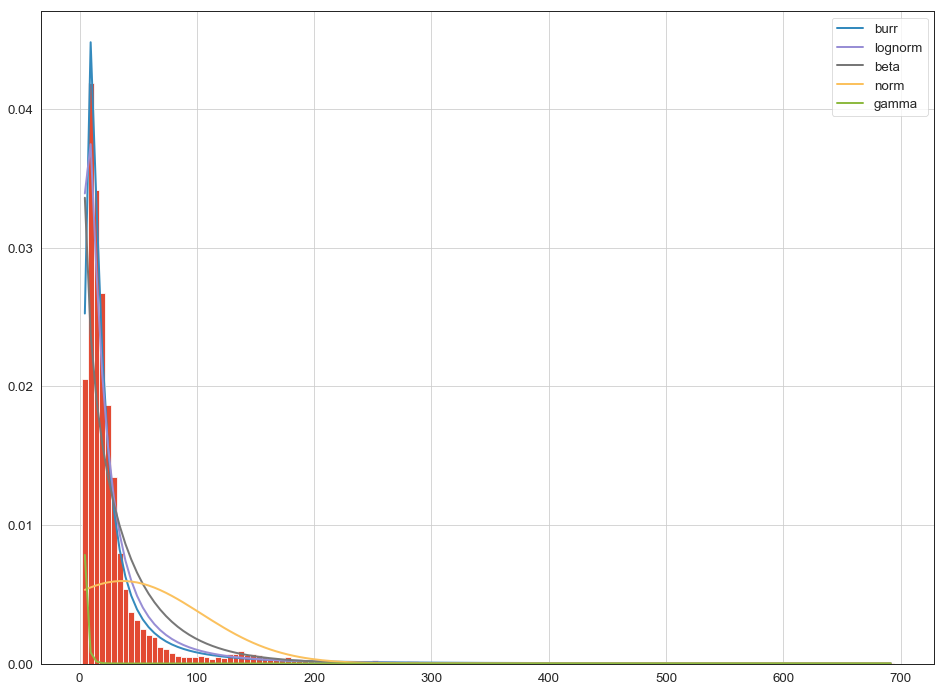

In [18]:
f = Fitter(rides,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"], bins = 140)
f.fit()
f.summary()

In [19]:
f.get_best(method = 'sumsquare_error')

{'burr': (1.3737669358348845,
  2.860834989750054,
  1.3350825373696553,
  6.071674544320713)}

In [20]:
f.get_best(method = 'aic')

{'burr': (1.3737669358348845,
  2.860834989750054,
  1.3350825373696553,
  6.071674544320713)}

In [21]:
f.get_best(method = 'bic')

{'burr': (1.3737669358348845,
  2.860834989750054,
  1.3350825373696553,
  6.071674544320713)}

### Fitting distributions with regards to the result of 5 from above including variety of common distributions

,aic,bic,kl_div,sumsquare_error
burr,2647.758064,-724511.734818,0.025628,0.000072
alpha,2533.800570,-680179.551872,0.038440,0.000246
beta,3464.799342,-630330.338679,0.216203,0.000975
norm,5704.519843,-587026.816263,0.935329,0.003230
bradford,1855.243807,-579481.795700,1.951454,0.003978


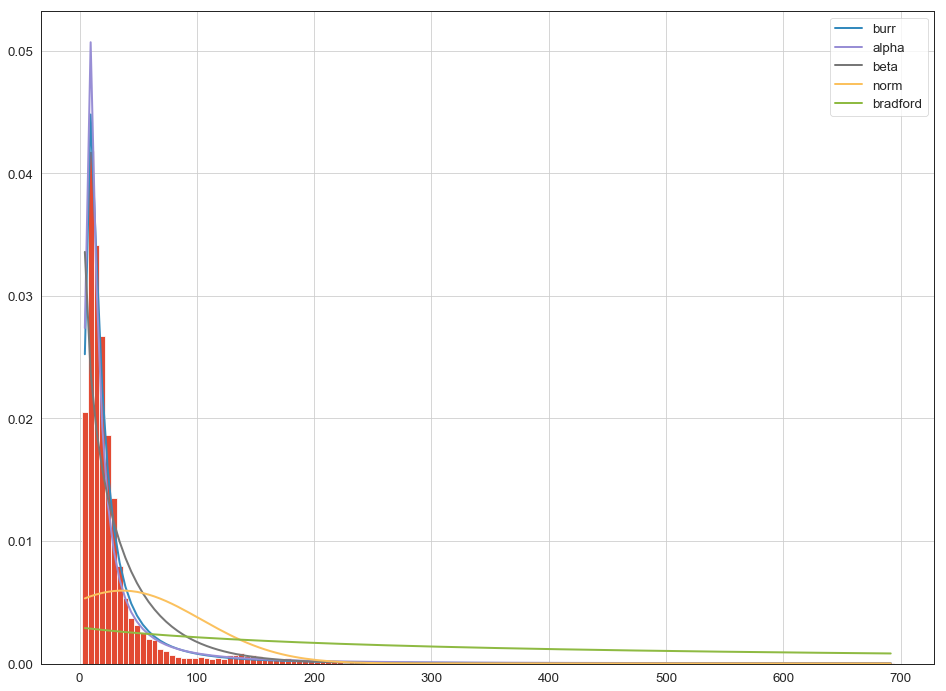

In [22]:
f = Fitter(rides,
           distributions= ['alpha','beta','norm','bradford','burr'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
expon,3815.246342,-636871.051753,0.217062,0.000814
dgamma,3277.220579,-631115.926583,0.081392,0.000954
chi2,3423.960379,-630376.571319,0.213479,0.000974
chi,3256.611828,-609096.571662,0.455715,0.001754
cosine,2098.351595,-576891.700110,1.903847,0.004275


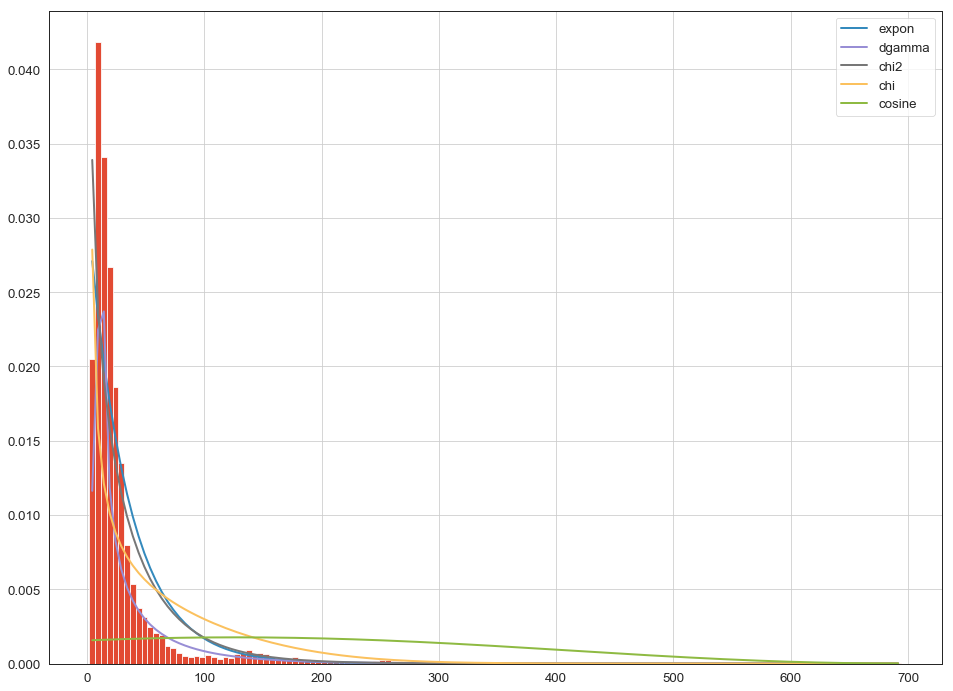

In [23]:
f = Fitter(rides,
           distributions= ['chi','chi2','cosine','dgamma','expon'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
f,2657.295269,-716067.917323,0.029533,0.000091
fisk,2754.162792,-708066.894405,0.035601,0.000114
fatiguelife,3025.000675,-648841.664955,0.138012,0.000585
exponnorm,3918.466165,-642851.591727,0.202112,0.000690
gamma,26527.849451,-575997.381148,1.800088,0.004381


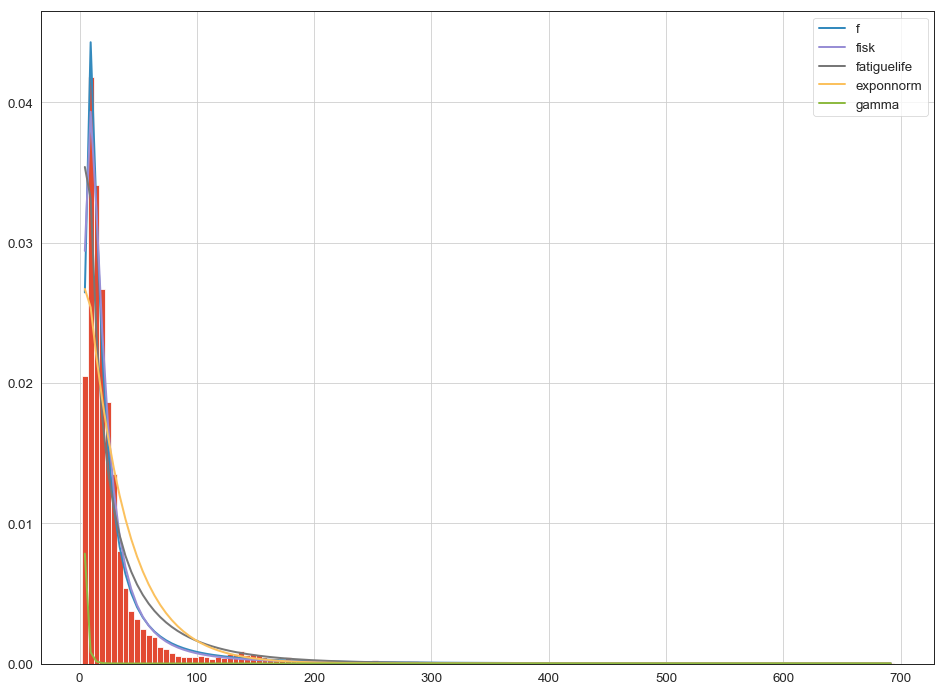

In [24]:
f = Fitter(rides,
           distributions= ['exponnorm','f','fatiguelife','fisk','gamma'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
lognorm,2827.664921,-672312.846385,0.068544,0.000306
genexpon,3821.203041,-636838.697977,0.217068,0.000814
gengamma,2906.132616,-624178.781500,0.241582,0.001156
levy,2280.331664,-621087.697887,0.201673,0.001260
loggamma,5641.016679,-586534.438083,0.952147,0.003274


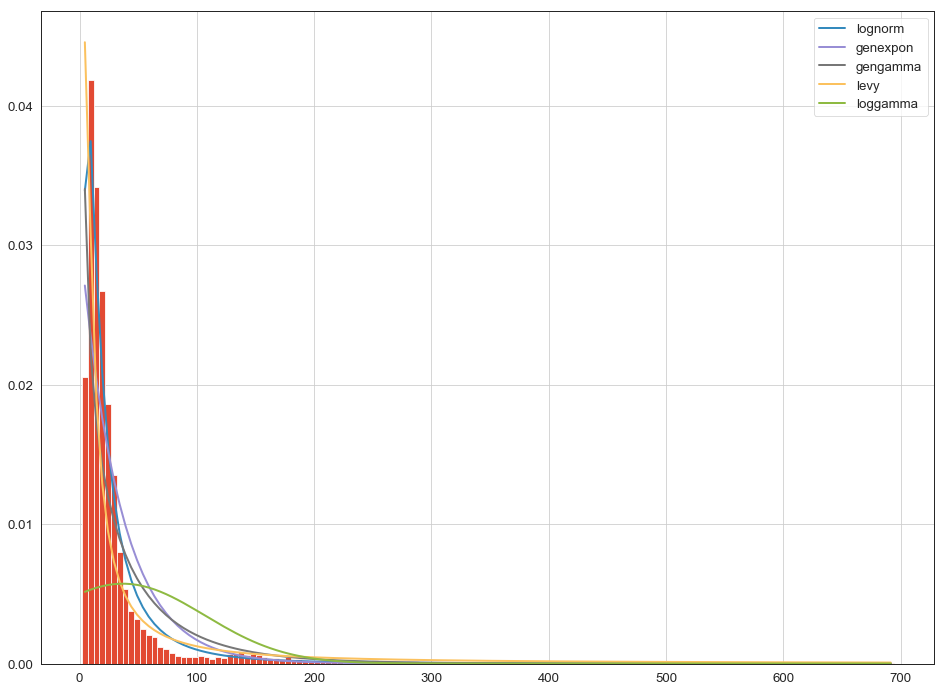

In [25]:
f = Fitter(rides,
           distributions= ['genexpon','gengamma','levy','loggamma','lognorm'], bins = 140)
f.fit()
f.summary()

,aic,bic,kl_div,sumsquare_error
t,2850.345208,-668019.756742,0.058863,0.000344
pearson3,3446.300321,-631037.630104,0.214154,0.000956
logistic,5332.907670,-604153.031643,0.435189,0.002012
powerlaw,2036.706216,-596147.888314,0.859734,0.002509
pareto,2392.615650,-581678.888436,0.418639,0.003744


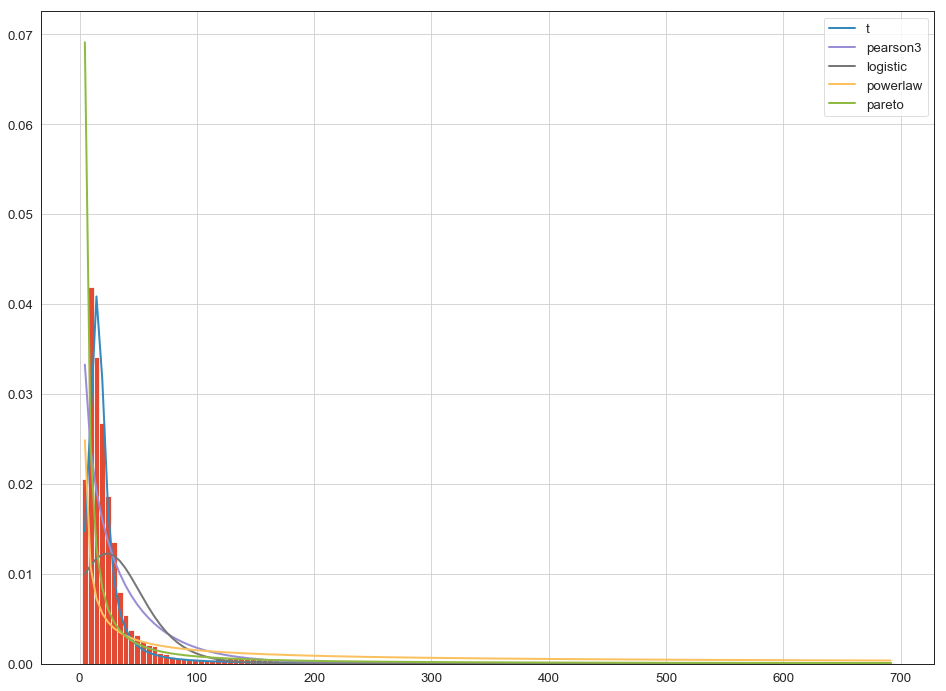

In [26]:
f = Fitter(rides,
           distributions= ['logistic','pareto','pearson3','powerlaw','t'], bins = 140)
f.fit()
f.summary()

### 5 best distributions chosen from the above analysis

,aic,bic,kl_div,sumsquare_error
burr,2647.758064,-724511.734818,0.025628,0.000072
f,2657.295269,-716067.917323,0.029533,0.000091
alpha,2533.800570,-680179.551872,0.038440,0.000246
lognorm,2827.664921,-672312.846385,0.068544,0.000306


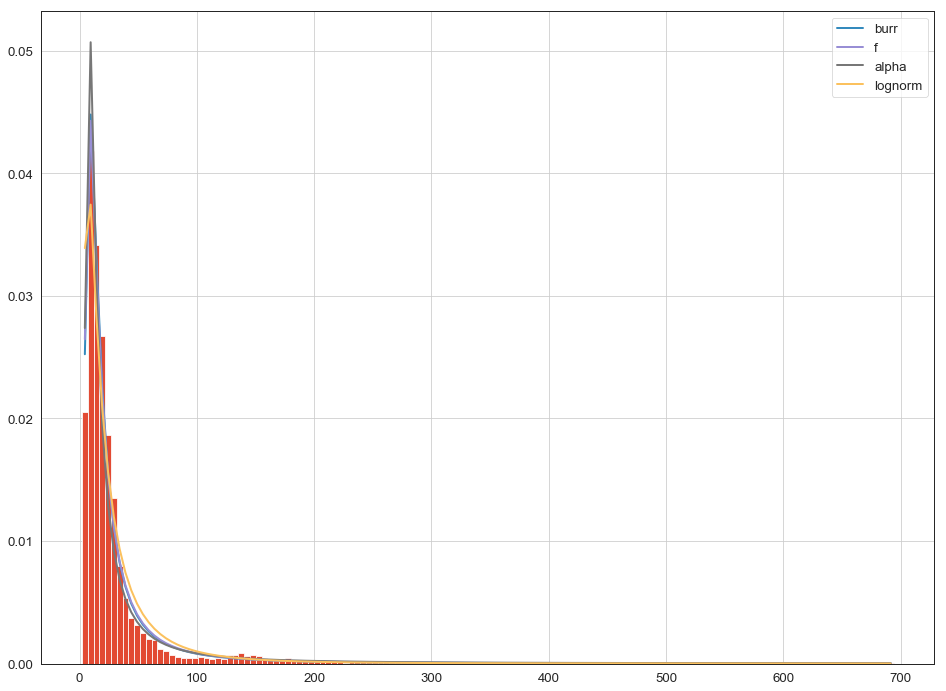

In [27]:
f = Fitter(rides,
           distributions= ['alpha','burr','lognorm', 'f'], bins = 140)
f.fit()
f.summary()